In [35]:
# Install library tambahan jika belum
!pip install openpyxl wordcloud seaborn --quiet

# Import pustaka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Baca file Excel
df = pd.read_excel("lowongan_simbelmawa_all_2.xlsx")

# Tampilkan 5 baris awal
df.head()

,Posisi,Mitra,Bidang,Lokasi,Deskripsi
0,Graphic Designer,PT Widya Inovasi Indonesia (Widya Robotics),Marketing,Provinsi : Daerah Istimewa Yogyakarta\nKabupat...,Pekerjaan yang bertanggung jawab untuk\nmencip...
1,Dokumentasi & Arsip,Kementerian Pekerjaan Umum,Administrasi Pemerintahan,Provinsi : Kalimantan Selatan\nKabupaten/Kota ...,"Manajemen Arsip, dan Dokumen"
2,Warehouse Staff,PT DSV Solutions Indonesia,Operasional Warehouse,"Provinsi: Jakarta, Jawa Barat, Sumatera, Kalim...",Sebagai Warehouse Staff magang di PT. DSV\nSol...
3,Project Manajemen,PT DSV Solutions Indonesia,Office Support,"Provinsi : Jakarta, Jawa Tengah\nKabupaten/Kot...",Peserta magang akan terlibat dalam proses\nimp...
4,Office Staff Logistik,PT DSV Solutions Indonesia,Office Support,"Provinsi : Jakarta, Jawa Barat\nKabupaten/Kota...",Peserta magang akan terlibat dalam pekerjaan o...


In [36]:
print("Jumlah baris sebelum menghapus duplikasi:", len(df))
df = df.drop_duplicates()
print("Jumlah baris setelah menghapus duplikasi:", len(df))

Jumlah baris sebelum menghapus duplikasi: 305
Jumlah baris setelah menghapus duplikasi: 238


In [37]:
# Rename kolom agar lebih mudah diakses
df.columns = ['Posisi', 'Mitra', 'Bidang', 'Lokasi', 'Deskripsi']

# Cek jumlah data dan kolom
print("Jumlah data:", len(df))
print("\nInfo data:")
print(df.info())

# Cek apakah ada nilai kosong
print("\nNilai kosong per kolom:")
print(df.isnull().sum())

# Pisahkan Lokasi menjadi Provinsi, Kabupaten/Kota, dan Kecamatan
df[['Provinsi', 'Kabupaten_Kota', 'Kecamatan']] = df['Lokasi'].str.extract(
    r'Provinsi\s*[:：]?\s*(.*?)\s*Kabupaten/Kota\s*[:：]?\s*(.*?)\s*Kecamatan\s*[:：]?\s*(.*)'
)

# Bersihkan spasi
df['Provinsi'] = df['Provinsi'].str.strip()
df['Kabupaten_Kota'] = df['Kabupaten_Kota'].str.strip()
df['Kecamatan'] = df['Kecamatan'].str.strip()

# Cek ulang setelah split
df.head()

Jumlah data: 238

Info data:
<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Posisi     238 non-null    object
 1   Mitra      238 non-null    object
 2   Bidang     238 non-null    object
 3   Lokasi     238 non-null    object
 4   Deskripsi  238 non-null    object
dtypes: object(5)
memory usage: 11.2+ KB
None

Nilai kosong per kolom:
Posisi       0
Mitra        0
Bidang       0
Lokasi       0
Deskripsi    0
dtype: int64


,Posisi,Mitra,Bidang,Lokasi,Deskripsi,Provinsi,Kabupaten_Kota,Kecamatan
0,Graphic Designer,PT Widya Inovasi Indonesia (Widya Robotics),Marketing,Provinsi : Daerah Istimewa Yogyakarta\nKabupat...,Pekerjaan yang bertanggung jawab untuk\nmencip...,Daerah Istimewa Yogyakarta,Sleman,Ngaglik
1,Dokumentasi & Arsip,Kementerian Pekerjaan Umum,Administrasi Pemerintahan,Provinsi : Kalimantan Selatan\nKabupaten/Kota ...,"Manajemen Arsip, dan Dokumen",Kalimantan Selatan,Kota Banjarmasin,Banjarmasin Selatan
2,Warehouse Staff,PT DSV Solutions Indonesia,Operasional Warehouse,"Provinsi: Jakarta, Jawa Barat, Sumatera, Kalim...",Sebagai Warehouse Staff magang di PT. DSV\nSol...,NaN,NaN,NaN
3,Project Manajemen,PT DSV Solutions Indonesia,Office Support,"Provinsi : Jakarta, Jawa Tengah\nKabupaten/Kot...",Peserta magang akan terlibat dalam proses\nimp...,"Jakarta, Jawa Tengah","Jakarta, Semarang","Makasar, Candi"
4,Office Staff Logistik,PT DSV Solutions Indonesia,Office Support,"Provinsi : Jakarta, Jawa Barat\nKabupaten/Kota...",Peserta magang akan terlibat dalam pekerjaan o...,"Jakarta, Jawa Barat","Jakarta, Bekasi","Makasar, Medan Satria"


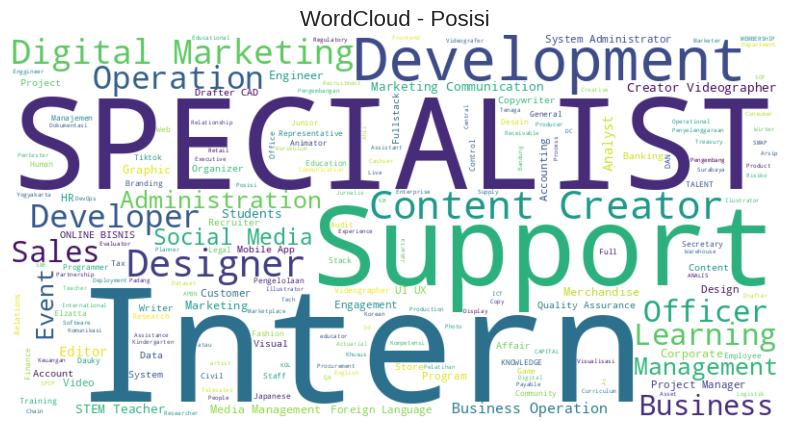

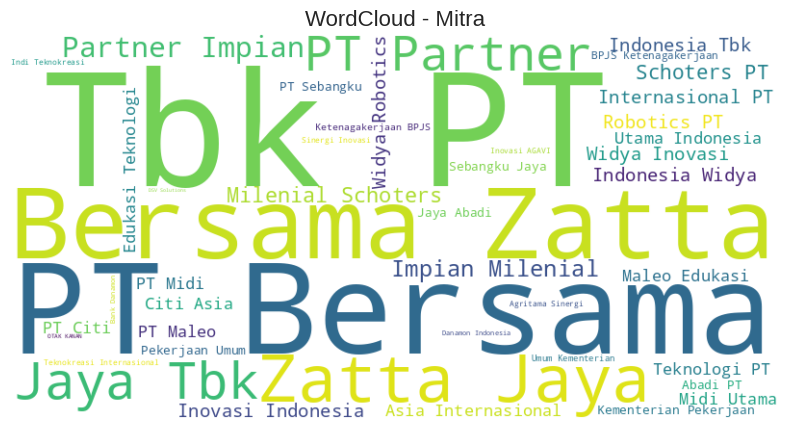

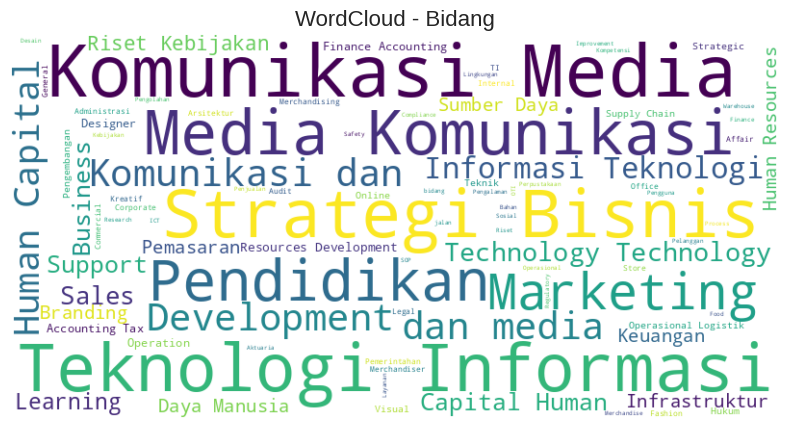

In [38]:
# Fungsi bantu untuk tampilkan word cloud
def show_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# WordCloud: POSISI
show_wordcloud(" ".join(df["Posisi"].dropna()), "WordCloud - Posisi")

# WordCloud: MITRA
show_wordcloud(" ".join(df["Mitra"].dropna()), "WordCloud - Mitra")

# WordCloud: BIDANG
show_wordcloud(" ".join(df["Bidang"].dropna()), "WordCloud - Bidang")


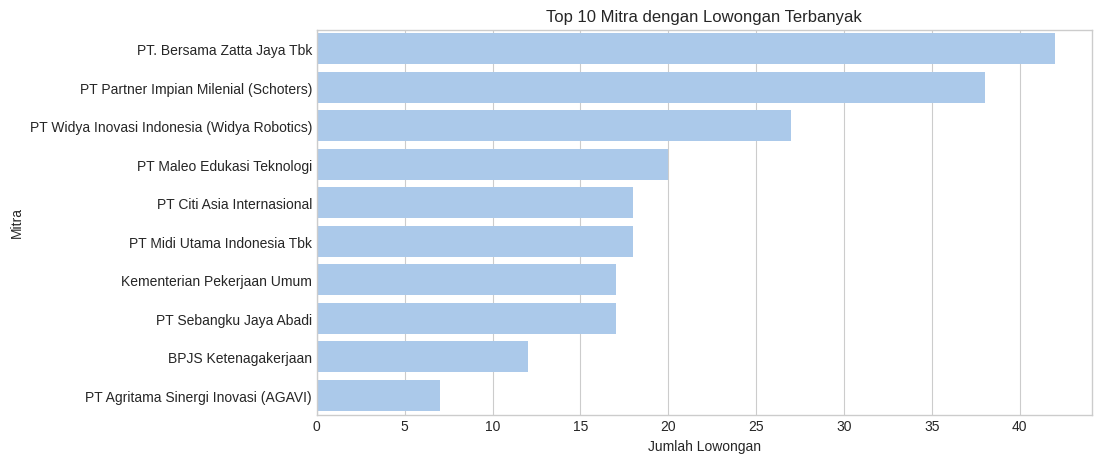

In [39]:
# Set gaya visualisasi
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("pastel")

# Top 10 Mitra
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Mitra", order=df["Mitra"].value_counts().iloc[:10].index)
plt.title("Top 10 Mitra dengan Lowongan Terbanyak")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Mitra")
plt.show()

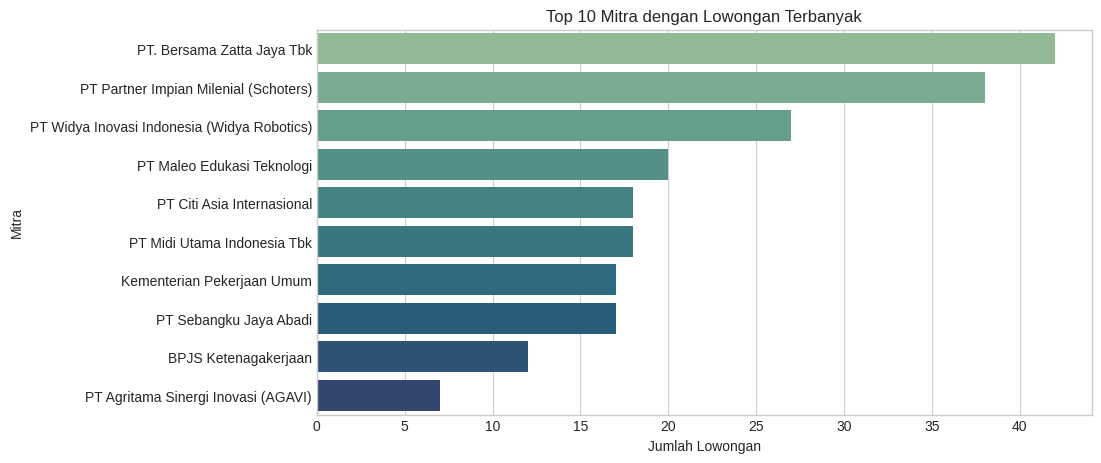

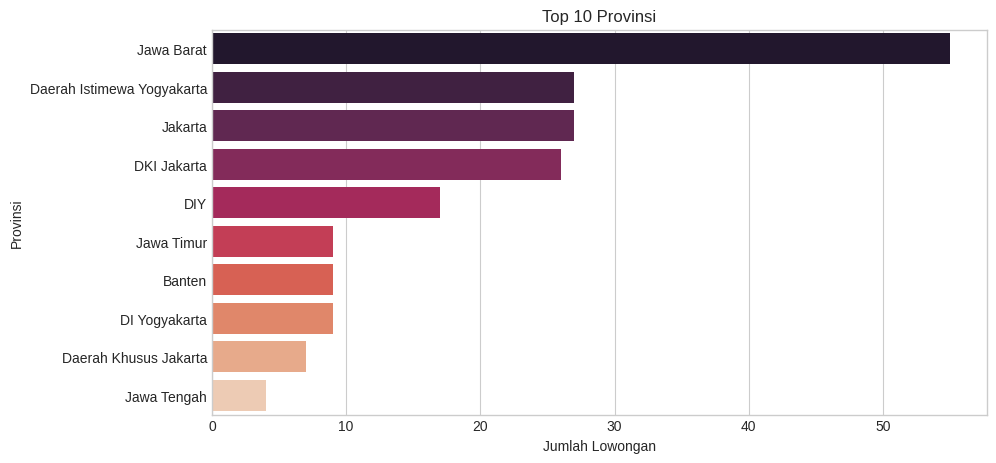

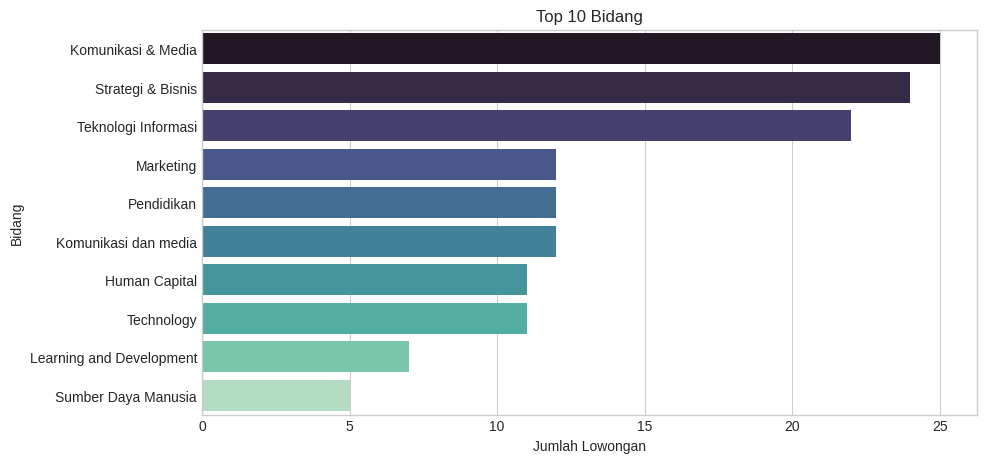

In [40]:
# Top 10 Mitra
top_mitra = df["Mitra"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_mitra.values, y=top_mitra.index, palette="crest")
plt.title("Top 10 Mitra dengan Lowongan Terbanyak")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Mitra")
plt.show()

# Top 10 Provinsi
top_prov = df["Provinsi"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_prov.values, y=top_prov.index, palette="rocket")
plt.title("Top 10 Provinsi")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Provinsi")
plt.show()

# Top 10 Bidang
top_bidang = df["Bidang"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_bidang.values, y=top_bidang.index, palette="mako")
plt.title("Top 10 Bidang")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Bidang")
plt.show()

In [41]:
# Kata kunci relevan dari CV Emejleano
keywords = [
    "Machine Learning", "AI", "Web Development", "UI/UX",
    "Riset", "Research", "Data", "Front-End", "Figma", "Design",
    "Informatika", "IT", "Teknologi", "Ilmiah", "Akademik"
]

# Lokasi prioritas berdasarkan tempat tinggal
lokasi_prioritas = ['Banten', 'Tangerang', 'Jakarta', 'Bekasi']

In [42]:
def skor_lowongan(row):
    skor = 0

    # Cek kesesuaian dengan bidang
    for keyword in keywords:
        if keyword.lower() in str(row['Posisi']).lower():
            skor += 3
        if keyword.lower() in str(row['Bidang']).lower():
            skor += 2
        if keyword.lower() in str(row['Mitra']).lower():
            skor += 1

    # Tambah skor berdasarkan lokasi
    for loc in lokasi_prioritas:
        if loc.lower() in str(row['Provinsi']).lower():
            skor += 3
        if loc.lower() in str(row['Kabupaten_Kota']).lower():
            skor += 2
        if loc.lower() in str(row['Kecamatan']).lower():
            skor += 1

    return skor

# Tambah kolom skor
df['Skor_Kecocokan'] = df.apply(skor_lowongan, axis=1)

In [43]:
# Urutkan berdasarkan skor
top5 = df.sort_values(by='Skor_Kecocokan', ascending=False).head(5)

# Tampilkan hasil
top5[['Posisi', 'Mitra', 'Bidang', 'Provinsi', 'Kabupaten_Kota', 'Skor_Kecocokan']]

,Posisi,Mitra,Bidang,Provinsi,Kabupaten_Kota,Skor_Kecocokan
83,UI/UX Designer,PT Citi Asia Internasional,Teknologi Informasi,DKI Jakarta,Jakarta Timur,14
81,IT Project Manager,PT Citi Asia Internasional,Teknologi Informasi,DKI Jakarta,Jakarta Timur,11
251,IT,PT Maleo Edukasi Teknologi,Teknologi Informasi,Banten,Tangerang Selatan,11
301,IT Support / System Administrator (3),PT Bank Danamon Indonesia Tbk,Teknologi & Informasi,DKI Jakarta,Jakarta Pusat,10
292,Data Analyst / Data Scientist,PT Partner Impian Milenial (Schoters),Teknologi Informasi,Jakarta,Jakarta Pusat,10


In [44]:
# Hitung skor maksimum dari semua lowongan untuk normalisasi
skor_max = df['Skor_Kecocokan'].max()

# Fungsi hitung probabilitas diterima berdasarkan skor kecocokan
def hitung_probabilitas(skor, skor_max):
    # Normalisasi ke skala 0-100
    return round((skor / skor_max) * 100, 2)

# Tambahkan kolom probabilitas
df['Probabilitas_Diterima'] = df['Skor_Kecocokan'].apply(lambda x: hitung_probabilitas(x, skor_max))

# Lanjutkan ke top 5
top5 = df.sort_values(by='Skor_Kecocokan', ascending=False).head(5)

In [45]:
top5[['Posisi', 'Mitra', 'Bidang', 'Provinsi', 'Kabupaten_Kota', 'Skor_Kecocokan', 'Probabilitas_Diterima']]

,Posisi,Mitra,Bidang,Provinsi,Kabupaten_Kota,Skor_Kecocokan,Probabilitas_Diterima
83,UI/UX Designer,PT Citi Asia Internasional,Teknologi Informasi,DKI Jakarta,Jakarta Timur,14,100.00
81,IT Project Manager,PT Citi Asia Internasional,Teknologi Informasi,DKI Jakarta,Jakarta Timur,11,78.57
251,IT,PT Maleo Edukasi Teknologi,Teknologi Informasi,Banten,Tangerang Selatan,11,78.57
301,IT Support / System Administrator (3),PT Bank Danamon Indonesia Tbk,Teknologi & Informasi,DKI Jakarta,Jakarta Pusat,10,71.43
292,Data Analyst / Data Scientist,PT Partner Impian Milenial (Schoters),Teknologi Informasi,Jakarta,Jakarta Pusat,10,71.43


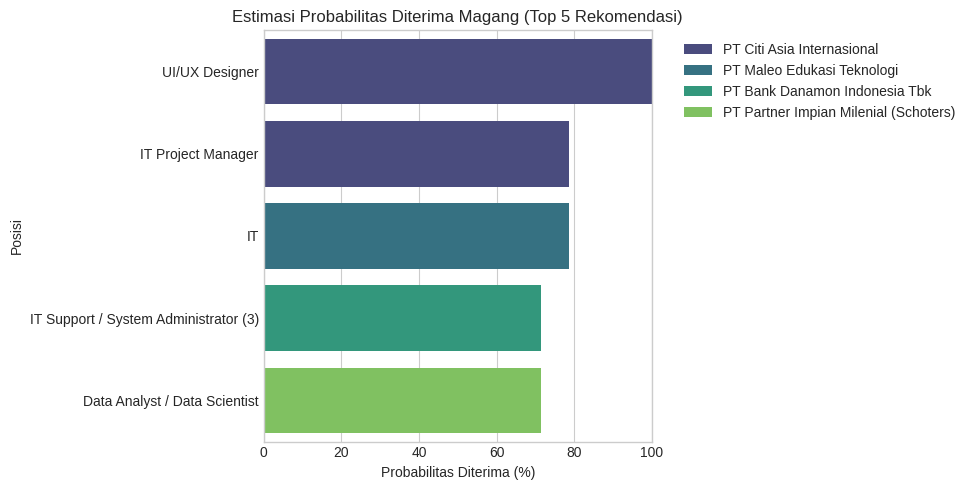

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(data=top5, x='Probabilitas_Diterima', y='Posisi', hue='Mitra', palette="viridis")
plt.title("Estimasi Probabilitas Diterima Magang (Top 5 Rekomendasi)")
plt.xlabel("Probabilitas Diterima (%)")
plt.ylabel("Posisi")
plt.xlim(0, 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [47]:
!pip install textblob --quiet
from textblob import TextBlob

In [48]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity  # hasil antara -1 (negatif) s.d. +1 (positif)

df['Sentimen'] = df['Deskripsi'].apply(get_sentiment)

In [49]:
# Tambahkan kategori sentimen
def label_sentimen(score):
    if score > 0.2:
        return "Positif"
    elif score < -0.2:
        return "Negatif"
    else:
        return "Netral"

df['Kategori_Sentimen'] = df['Sentimen'].apply(label_sentimen)

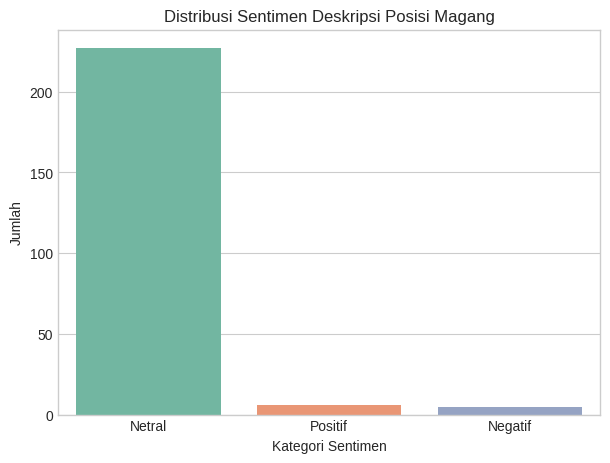

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Kategori_Sentimen', palette='Set2')
plt.title("Distribusi Sentimen Deskripsi Posisi Magang")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah")
plt.show()

In [52]:
df_filtered = df[df['Kategori_Sentimen'].isin(['Positif', 'Netral'])]

In [53]:
# Daftar keyword dari CV kamu
keywords_cv = [
    "machine learning", "ai", "web", "ui/ux", "figma", "research",
    "riset", "data", "design", "akademik", "frontend", "informatika",
    "pengembangan", "cloud", "python", "java", "devops"
]

In [54]:
# Fungsi untuk menghitung jumlah keyword CV dalam deskripsi
def hitung_keyword_cv(text):
    text = str(text).lower()
    return sum(1 for keyword in keywords_cv if keyword in text)

# Tambahkan kolom Skor_Deskripsi
df_filtered['Skor_Deskripsi'] = df_filtered['Deskripsi'].apply(hitung_keyword_cv)

# Beri bobot (misal 2 poin per keyword match)
df_filtered['Skor_Kecocokan'] += df_filtered['Skor_Deskripsi'] * 2

# Update skor maksimum dan hitung ulang probabilitas
skor_max = df_filtered['Skor_Kecocokan'].max()
df_filtered['Probabilitas_Diterima'] = df_filtered['Skor_Kecocokan'].apply(
    lambda x: round((x / skor_max) * 100, 2)
)

# Ambil 5 teratas
top5_final = df_filtered.sort_values(by='Skor_Kecocokan', ascending=False).head(5)

In [56]:
# Tampilkan hasil akhir yang mempertimbangkan deskripsi
top5_final[['Posisi', 'Mitra', 'Bidang', 'Provinsi', 'Kabupaten_Kota', 'Skor_Kecocokan', 'Skor_Deskripsi',
            'Probabilitas_Diterima', 'Kategori_Sentimen']]

,Posisi,Mitra,Bidang,Provinsi,Kabupaten_Kota,Skor_Kecocokan,Skor_Deskripsi,Probabilitas_Diterima,Kategori_Sentimen
83,UI/UX Designer,PT Citi Asia Internasional,Teknologi Informasi,DKI Jakarta,Jakarta Timur,24,5,100.00,Netral
154,Research and Development Intern,PT Agritama Sinergi Inovasi (AGAVI),Research and Development,Jawa Barat,Bandung,16,5,66.67,Netral
85,Graphic Designer,PT Citi Asia Internasional,Komunikasi dan media,DKI Jakarta,Jakarta Timur,15,3,62.50,Netral
251,IT,PT Maleo Edukasi Teknologi,Teknologi Informasi,Banten,Tangerang Selatan,15,2,62.50,Netral
9,Digital Marketing,PT Indi Teknokreasi Internasional,Komunikasi & Media,Daerah Khusus Jakarta,Jakarta Timur,14,3,58.33,Netral


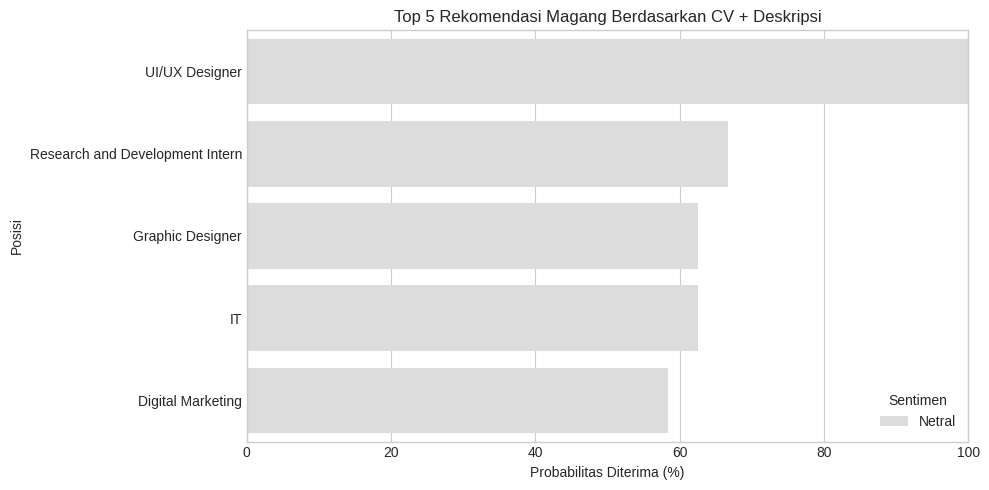

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(data=top5_final, x='Probabilitas_Diterima', y='Posisi', hue='Kategori_Sentimen', palette='coolwarm')
plt.title("Top 5 Rekomendasi Magang Berdasarkan CV + Deskripsi")
plt.xlabel("Probabilitas Diterima (%)")
plt.ylabel("Posisi")
plt.xlim(0, 100)
plt.legend(title='Sentimen')
plt.tight_layout()
plt.show()

In [59]:
# 🔽 Cetak daftar final 5 rekomendasi magang dengan format rapi
print("📌 Rekomendasi 5 Lowongan Magang Terbaik untuk Kamu:\n")

for i, row in top5_final.iterrows():
    print(f" #{i+1}")
    print(f" Posisi    : {row['Posisi']}")
    print(f" Mitra     : {row['Mitra']}")
    print(f" Bidang    : {row['Bidang']}")
    print(f" Lokasi    : {row['Kecamatan']}, {row['Kabupaten_Kota']}, {row['Provinsi']}")
    print(f" Skor Deskripsi     : {row['Skor_Deskripsi']} keyword cocok dari CV")
    print(f" Skor Total         : {row['Skor_Kecocokan']}")
    print(f" Probabilitas       : {row['Probabilitas_Diterima']}%")
    print(f" Sentimen Deskripsi : {row['Kategori_Sentimen']}")
    print("-" * 60)


📌 Rekomendasi 5 Lowongan Magang Terbaik untuk Kamu:

 #84
 Posisi    : UI/UX Designer
 Mitra     : PT Citi Asia Internasional
 Bidang    : Teknologi Informasi
 Lokasi    : Jatinegara, Jakarta Timur, DKI Jakarta
 Skor Deskripsi     : 5 keyword cocok dari CV
 Skor Total         : 24
 Probabilitas       : 100.0%
 Sentimen Deskripsi : Netral
------------------------------------------------------------
 #155
 Posisi    : Research and Development Intern
 Mitra     : PT Agritama Sinergi Inovasi (AGAVI)
 Bidang    : Research and Development
 Lokasi    : Coblong, Bandung, Jawa Barat
 Skor Deskripsi     : 5 keyword cocok dari CV
 Skor Total         : 16
 Probabilitas       : 66.67%
 Sentimen Deskripsi : Netral
------------------------------------------------------------
 #86
 Posisi    : Graphic Designer
 Mitra     : PT Citi Asia Internasional
 Bidang    : Komunikasi dan media
 Lokasi    : Jatinegara, Jakarta Timur, DKI Jakarta
 Skor Deskripsi     : 3 keyword cocok dari CV
 Skor Total         : 